In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping
from keras.regularizers import L1,L2
from tensorflow import keras

In [6]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='same',strides=(1, 1),input_shape =(256,256,3),activation='relu'))
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(1, 1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Conv2D(16,kernel_size=(3,3),padding='same',strides=(1, 1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Conv2D(8,kernel_size=(3,3),padding='same',strides=(1, 1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Conv2D(8,kernel_size=(3,3),padding='same',strides=(1, 1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Flatten())

model.add(Dense(64,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())
model.add(Dropout(0.03))

model.add(Dense(32,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())
model.add(Dropout(0.02))

model.add(Dense(16,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())
model.add(Dropout(0.01))


model.add(Dense(8,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())

model.add(Dense(4,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())

model.add(Dense(2,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid',kernel_regularizer=L1(l1=0.05)))

/Users/pradyumnaswain/miniforge3/envs/tf_arm/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-11 19:04:36.836523: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-10-11 19:04:36.836679: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-10-11 19:04:36.836688: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-10-11 19:04:36.836987: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-11 19:04:36.836996: I tensorflow/core/common_runtime/pluggable_device/pluggable_

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 8)    │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256, 256, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 256, 256, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 8)    │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256, 256, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 256, 256, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    33,554,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           52

 Total params: 33,584,673 (128.12 MB)

 Trainable params: 33,584,293 (128.11 MB)

 Non-trainable params: 380 (1.48 KB)

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/Users/pradyumnaswain/JU python/Practice/Sla practice/CNN2_project/Train',
    labels="inferred",
    batch_size=16,
    image_size=(256, 256)
)

Found 3001 files belonging to 2 classes.


In [13]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/Users/pradyumnaswain/JU python/Practice/Sla practice/CNN2_project/Test',
    labels="inferred",
    batch_size=16,
    image_size=(256, 256)
)

Found 1000 files belonging to 2 classes.


In [7]:
model.fit(train_ds,batch_size=30,epochs=50,callbacks=EarlyStopping(),validation_data=test_ds)

Epoch 1/50


2025-10-09 13:57:07.740057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


188/188 ━━━━━━━━━━━━━━━━━━━━ 156s 805ms/step - acc: 0.5453 - loss: 502.7713 - val_acc: 0.4800 - val_loss: 210.1918
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 748ms/step - acc: 0.5141 - loss: 203.2649 - val_acc: 0.5000 - val_loss: 192.7200
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 154s 817ms/step - acc: 0.5453 - loss: 191.1160 - val_acc: 0.5000 - val_loss: 186.3463
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 148s 786ms/step - acc: 0.6108 - loss: 186.8616 - val_acc: 0.4970 - val_loss: 193.4857


In [11]:
model.get_weights()

[array([[[[-0.00145127, -0.04363663, -0.06090626, ..., -0.0388636 ,
           -0.06723385, -0.09346104],
          [ 0.09315159, -0.10573959,  0.07908028, ..., -0.01141079,
            0.01396445,  0.00954382],
          [ 0.07415538, -0.0951318 ,  0.10153577, ...,  0.01267404,
            0.05214519,  0.03151868]],
 
         [[-0.05610762, -0.00297609, -0.03797531, ...,  0.02543137,
           -0.09406807,  0.0048319 ],
          [-0.05084708, -0.0474109 ,  0.02838318, ..., -0.04792797,
            0.0092491 , -0.07725231],
          [-0.06705478,  0.07663518,  0.03469003, ...,  0.02043743,
            0.06455731, -0.1278449 ]],
 
         [[-0.02183759, -0.06301562,  0.00026178, ...,  0.00843924,
           -0.00788447,  0.03508031],
          [-0.07782591,  0.03280874,  0.08324862, ...,  0.07344844,
            0.04971307, -0.00569727],
          [ 0.04773776,  0.08585285,  0.02164499, ..., -0.07306384,
           -0.03112381, -0.05163096]]],
 
 
        [[[ 0.05754582, -0.0232249

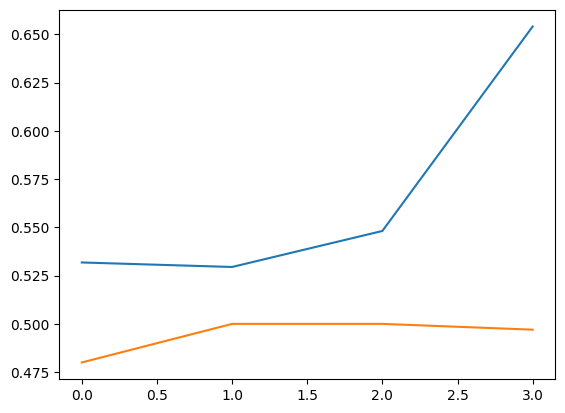

In [19]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])

In [2]:
import cv2

In [3]:
img = cv2.imread('/Users/pradyumnaswain/JU python/Practice/Sla practice/CNN2_project/Test/Normal/Normal- (1501).jpg')

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

NameError: name 'plt' is not defined

In [85]:
img1 = cv2.resize(img,(256,256))

In [86]:
img2 = img1.reshape((1,256,256,3))

In [87]:
if (model.predict(img2))>0.5:
    print('Normal')
else:
    print('Tumor')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
Tumor
